# Average Body Temperature

Consider the population of many adults. A researcher hypothesized that the average adult body temperature is lower than the often-advertised 37 $^\circ$. That is, the researcher wants an answer to the question: "Is the average adult body temperature 37 $^\circ$? Or is it lower?".

In order to answer the question, he selects a random sample of 130 adults. The average body temperature of the 130 sampled adults is 36.2 degrees, with a standard deviation of 0.1.

## Part 1

What can the reasearcher say about his initial hypothesis?

In order to answer, use the following hints and answer these questions:

- the test statistic you can use is $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$ (where $\bar{x}$ is the mean of the sample, $\mu$ is the population mean, $s$ is the standard deviation of the sample and $n$ is the size of the sample), whose PDF is a t-student with $n - 1$ degrees of freedom
- what is the null hypothesis? and the alternative?
- can the researcher reject the null hypothesis with a significance level of 0.05? and 0.01?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.integrate import quad

In [2]:
def test_statistic(x, mu, s, n):
    return (x - mu) / (s / np.sqrt(n))

In [3]:
mu_null = 37

n_sample = 100
mu_sample = 36.7
std_sample = 1.4

In [4]:
observed_ts = test_statistic(mu_sample, mu_null, std_sample, n_sample)
print(observed_ts)

-2.142857142857123


In [5]:
# check multiple values of TS to see in which direction we have "more extreme results"
test_temp = np.array([40, 39, 37, 36.5, 35, 31])
print(test_statistic(test_temp, mu_null, std_sample, n_sample))

[ 21.42857143  14.28571429   0.          -3.57142857 -14.28571429
 -42.85714286]


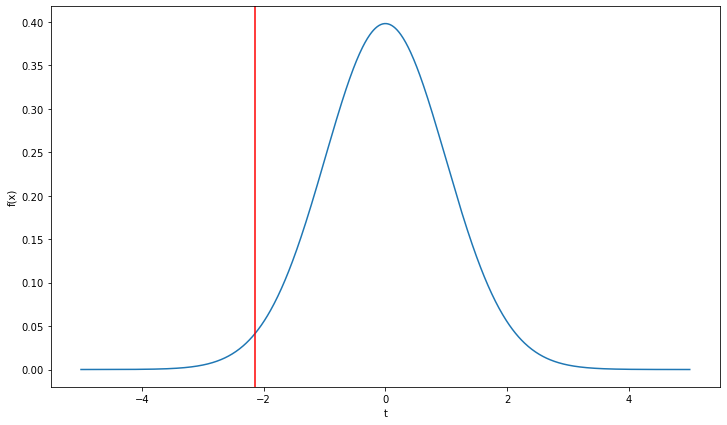

In [6]:
frozen = t(n_sample - 1)
x = np.linspace(-5, 5, 1000)
y = frozen.pdf(x)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)
ax.axvline(observed_ts, color="red")
ax.set_xlabel("t")
ax.set_ylabel("f(x)");

In [7]:
p_value, _ = quad(frozen.pdf, -np.inf, observed_ts)

In [8]:
p_value

0.017287890141442833

In [9]:
p_value < 0.05

True

In [10]:
p_value < 0.01

False

## Part 2

Repeat the exercise, but instead of using the t-student PDF sample the distribution from what you know about the null hypothesis. You can consider the temperature of the population following a gaussian distribution with mean 37 (as stated above) and standard deviation 0.4.

In [11]:
mu_null = 37
sigma_null = 0.4

toy_size = 10000
n_toys = 50000

In [12]:
# rows = elements in one toy
# columns = how many toys
samples = np.random.normal(mu_null, sigma_null, size=(toy_size, n_toys))

In [13]:
means = np.mean(samples, axis=0)
stds = np.std(samples, axis=0)

In [14]:
test_statistics = test_statistic(means, mu_null, stds, toy_size)

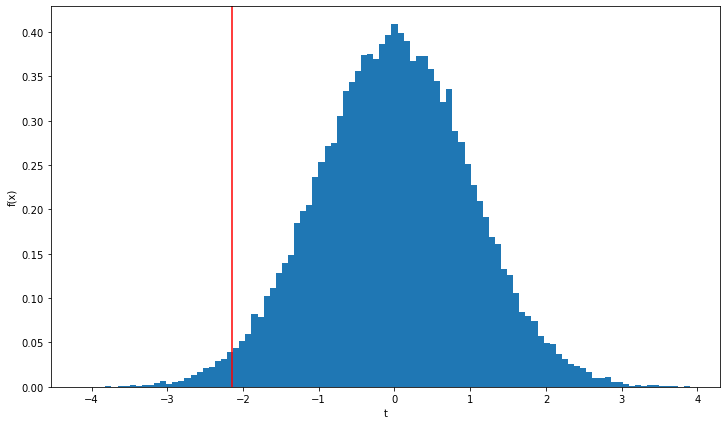

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.axvline(observed_ts, color="red")
ax.hist(test_statistics, bins=100, range=(min(test_statistics), max(test_statistics)), density=True)
ax.set_xlabel("t")
ax.set_ylabel("f(x)");

In [17]:
p_value = len(test_statistics[test_statistics < observed_ts]) / len(test_statistics)

In [18]:
p_value

0.0171

In [19]:
p_value < 0.05

True

In [20]:
p_value < 0.01

False